<a href="https://colab.research.google.com/github/cserock/colab-examples/blob/main/06_RNN_LSTM_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN(Recurrent Neural Network) / LSTM(Long Short Term Memory)

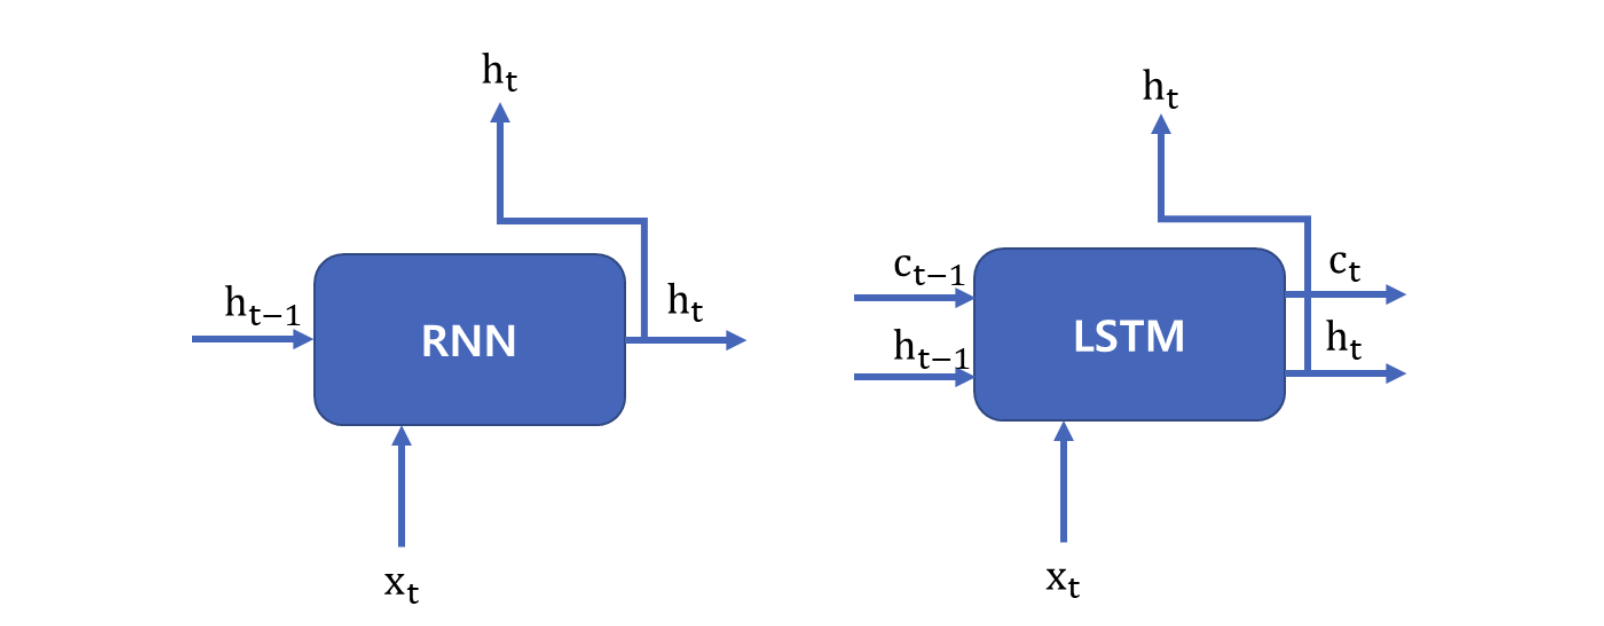

- 순환 신경망 , 스퀀스 데이터 (연속형 데이터) 처리에 유리한 인공신경망
- 이전 입력정보(과거)를 현재의 계산에 반영
- 순차적인 의존성을 학습

활용분야
- 자연어 처리
- 음성인식
- 시계열 예측
- 비디오 분석

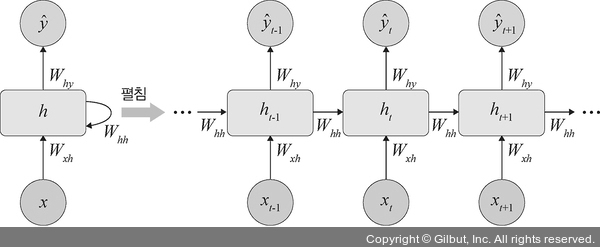

RNN의 수식

$$
h_t = \tanh(W_{hx}x_t + W_{hh}h_{t-1} + b_h)
$$

- $x_t$: 현재 입력 벡터 (예: 단어 임베딩 벡터)
- $h_{t-1}$: 이전 시간 스텝의 은닉 상태
- $W_{hx}$, $W_{hh}$: 가중치 행렬
- $b_h$: 바이어스 벡터
- $\tanh$: 비선형 활성화 함수

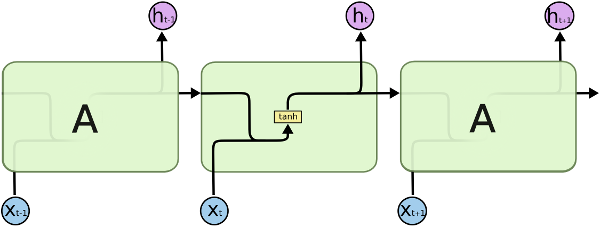

출력값
$$
y_t = W_{hy}h_t + b_y
$$

- $W_{hy}$: 은닉 상태에서 출력으로의 가중치 행렬
- $b_y$: 바이어스 벡터

---

# RNN 훈련

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# 1. 데이터 불러오기 및 전처리
max_features = 10000  # 가장 많이 사용된 단어의 수
maxlen = 500          # 시퀀스의 최대 길이

print('데이터 불러오는 중...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(f'훈련 샘플: {len(x_train)}, 테스트 샘플: {len(x_test)}')

print('시퀀스 패딩 중...')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('시퀀스 패딩 완료')

데이터 불러오는 중...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
훈련 샘플: 25000, 테스트 샘플: 25000
시퀀스 패딩 중...
시퀀스 패딩 완료


In [2]:
# 2. SimpleRNN 모델 구축

# Embedding
# input_dim: 단어 사전의 크기 (예: 10,000개의 단어)
# output_dim: 각 단어가 표현될 벡터의 차원 수 (여기서는 32차원)
# input_length: 입력 시퀀스의 길이 (예: 한 문장이 가진 최대 단어 수)

# SimpleRNN
# units : 은닉 상태(hidden state)의 차원

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=32, input_length=maxlen))
model.add(SimpleRNN(units=32))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
# 4. 모델 학습
print('SimpleRNN 모델 학습 중...')
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

SimpleRNN 모델 학습 중...
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 179ms/step - accuracy: 0.5597 - loss: 0.6798 - val_accuracy: 0.7290 - val_loss: 0.5844
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 183ms/step - accuracy: 0.7792 - loss: 0.5026 - val_accuracy: 0.7832 - val_loss: 0.4733
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 180ms/step - accuracy: 0.8544 - loss: 0.3472 - val_accuracy: 0.8190 - val_loss: 0.4160
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 192ms/step - accuracy: 0.9220 - loss: 0.2166 - val_accuracy: 0.8052 - val_loss: 0.4434
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 45s 219ms/step - accuracy: 0.9743 - loss: 0.0992 - val_accuracy: 0.7942 - val_loss: 0.5138
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 197ms/step - accuracy: 0.9901 - loss: 0.0501 - val_accuracy: 0.8220 - val_loss: 0.5191
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 216ms/step - accuracy: 0.9959 - loss: 0.0265 - val_accuracy: 0.8108 - val_loss: 0.5711
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 178ms/step - accur

In [5]:
# 5. 모델 평가
print('SimpleRNN 모델 평가 중...')
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'SimpleRNN Test Accuracy: {test_acc:.4f}')

SimpleRNN 모델 평가 중...
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7748 - loss: 0.7450
SimpleRNN Test Accuracy: 0.7736


In [7]:
# 6. 학습 과정 시각화
def plot_history(history, title):
    # 정확도 플롯
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # 손실 플롯
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

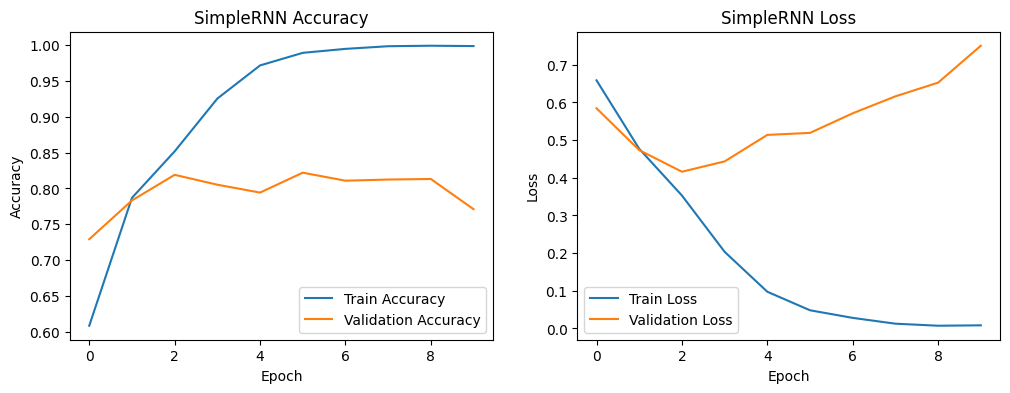

In [8]:
# SimpleRNN 학습 과정 시각화
plot_history(history, 'SimpleRNN')

# LSTM

In [9]:
# LSTM 모델 구축
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_features, output_dim=32, input_length=maxlen))
model_lstm.add(LSTM(units=32))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.summary()
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 모델 학습
print('LSTM 모델 학습 중...')
history_lstm = model_lstm.fit(x_train, y_train,
                              epochs=10,
                              batch_size=128,
                              validation_split=0.2)

LSTM 모델 학습 중...
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 68s 417ms/step - accuracy: 0.6247 - loss: 0.6477 - val_accuracy: 0.8020 - val_loss: 0.4307
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 73s 358ms/step - accuracy: 0.8580 - loss: 0.3466 - val_accuracy: 0.8684 - val_loss: 0.3165
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 60s 380ms/step - accuracy: 0.9195 - loss: 0.2204 - val_accuracy: 0.8818 - val_loss: 0.2912
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 55s 349ms/step - accuracy: 0.9442 - loss: 0.1640 - val_accuracy: 0.8766 - val_loss: 0.3646
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 64s 408ms/step - accuracy: 0.9580 - loss: 0.1318 - val_accuracy: 0.8774 - val_loss: 0.3436
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 78s 501ms/step - accuracy: 0.9639 - loss: 0.1127 - val_accuracy: 0.8816 - val_loss: 0.3708
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 73s 468ms/step - accuracy: 0.9774 - loss: 0.0778 - val_accuracy: 0.8680 - val_loss: 0.4136
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 69s 441ms/step - accuracy: 

In [12]:
# 모델 평가
print('LSTM 모델 평가 중...')
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(x_test, y_test)
print(f'LSTM Test Accuracy: {test_acc_lstm:.4f}')

LSTM 모델 평가 중...
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.8619 - loss: 0.4842
LSTM Test Accuracy: 0.8617


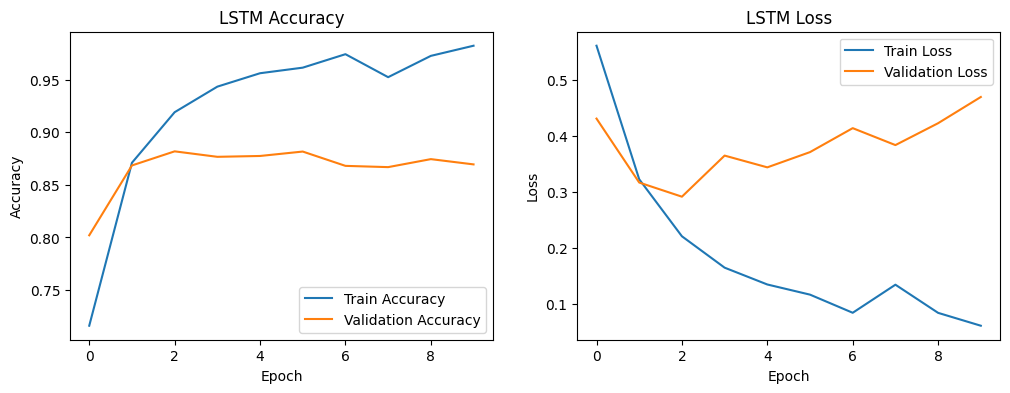

In [13]:
# LSTM 학습 과정 시각화
plot_history(history_lstm, 'LSTM')

---